TensorFlow version: 2.19.0
Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)

Let's check if images are RGB: 
One pixel value before normalization: [0.23137255 0.24313725 0.24705882]
One pixel value after normalization: [0.23137255 0.24313725 0.24705882]


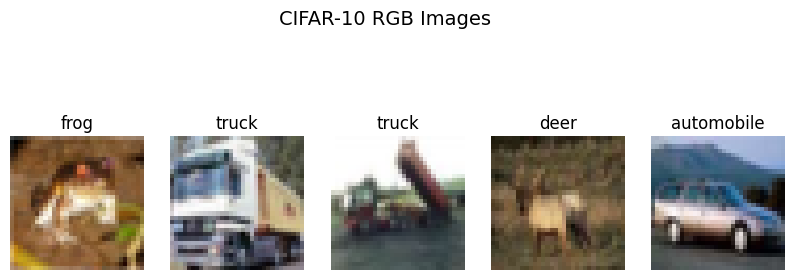

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3690 - loss: 1.6957 - val_accuracy: 0.5661 - val_loss: 1.2080
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5903 - loss: 1.1563 - val_accuracy: 0.6473 - val_loss: 1.0075
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6565 - loss: 0.9851 - val_accuracy: 0.6679 - val_loss: 0.9586
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6986 - loss: 0.8543 - val_accuracy: 0.6896 - val_loss: 0.8922
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.7254 - loss: 0.7806 - val_accuracy: 0.7037 - val_loss: 0.8507
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7504 - loss: 0.7139 - val_accuracy: 0.7117 - val_loss: 0.8495
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7695 - loss: 0.6550 - val_accuracy: 0.7047 - val_loss: 0.8538
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7854 -

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

# Task 2: Load and understand the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# CORRECTION: These are RB images (32x32 pixels with 3 color channels)
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

#normalize RGB pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Task 3: Verify these are color images
print("\nLet's check if images are RGB: ")
print(f"One pixel value before normalization: {train_images[0,0,0]}")
print(f"One pixel value after normalization: {train_images[0,0,0]}")

# Visualize some RGB images
plt.figure(figsize=(10, 4))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(train_images[i]) # This shows RGB colors
  plt.title(class_names[train_labels[i][0]])
  plt.axis('off')
plt.suptitle('CIFAR-10 RGB Images', fontsize=14)
plt.show()

# Task 4: Build CNN model (input_shape= (32, 32, 3) for RGB
model = models.Sequential([
    # Input: 32x32 RB images (3 channels)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Upload an image to test the CNN!


Saving Cat.avif to Cat (1).avif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


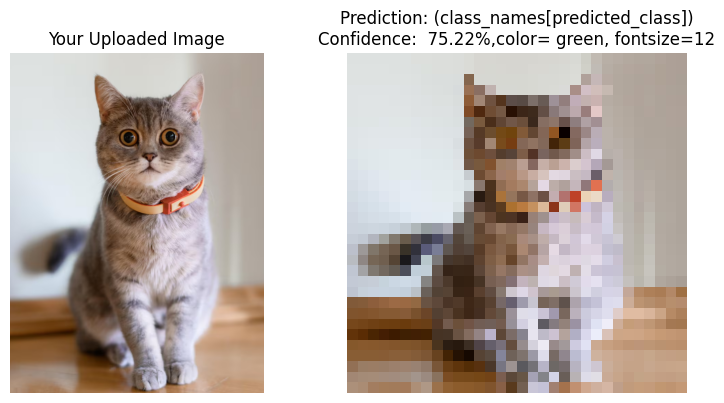

AI says: This is a cat!
Confidence level: 75.22%


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

print("Upload an image to test the CNN!")
uploaded = files.upload()

# Step 2: The code will process your image
for filename in uploaded.keys():
  # Load and resize image
  img = image.load_img(filename, target_size=(32, 32))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)

  # Make prediction
  prediction = model.predict (img_array)
  predicted_class = np.argmax(prediction[0])
  confidence = np.max(prediction [0])

  # Show results
  plt. figure(figsize=(8, 4))

  plt. subplot (1, 2, 1)
  original_img = image.load_img(filename)
  plt.imshow(original_img)
  plt.title('Your Uploaded Image')
  plt.axis('off')

  plt.subplot (1, 2, 2)
  plt.imshow (img)
  plt. title(f'Prediction: (class_names[predicted_class])\nConfidence: {confidence: .2%},color= green, fontsize=12')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  print(f"AI says: This is a {class_names[predicted_class]}!")
  print(f"Confidence level: {confidence:.2%}")